# 02B: Cardinal Circuit Generation

Construct a memory experiment circuit using the `cardinal` strategy with a BPC code.

- **Strategy used in this notebook:** `cardinal`
- **Codes that support `cardinal`:** `HgpCode`, `BpcCode`, `QlpCode`, `LcsCode`
- `cardinal` is the default strategy used by `build_circuit(...)` for these codes. 

For more information, see M. Kang, Y. Lin et al., arXiv:2504.02673

In [1]:
import numpy as np
from quits.circuit import check_overlapping_CX
from quits import ErrorModel, CircuitBuildOptions
from quits.qldpc_code import HgpCode, QlpCode, BpcCode, LcsCode

In [2]:
# BPC parameters requested for this notebook
lift_size, factor = 6, 3
p1 = [0, 1, 2]
p2 = [0, 4, 5]

# Common circuit parameters
p = 1e-3
num_rounds = 15

error_model = ErrorModel(
    idle_error=p,
    sqgate_error=p,
    tqgate_error=p,
    spam_error=p,
)

circuit_build_options = CircuitBuildOptions(
    get_all_detectors=False,
    noisy_zeroth_round=True,
    noisy_final_meas=False,
)

In [3]:
# BPC code example
code = BpcCode(p1, p2, lift_size, factor)

In [4]:
# Build memory circuit with cardinal strategy
circuit = code.build_circuit(
    strategy="cardinal",    # try "cardinalnsmerge" too! depth is 7
    error_model=error_model,
    num_rounds=num_rounds,
    basis="Z",
    circuit_build_options=circuit_build_options,
    seed=1,
)

check_overlapping_CX(circuit)
print("Entangling depth:", code.depth)
print(circuit)

No overlapping CX gates found.
Entangling depth: 8
R 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
X_ERROR(0.001) 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
R 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
X_ERROR(0.001) 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
TICK
H 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
DEPOLARIZE1(0.001) 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
TICK
CX 24 0 25 1 26 2 33 3 34 4 29 5 21 6 22 7 23 8 18 15 19 10 20 11 55 37 57 39 59 41 66 42 60 51 69 45 63 48 61 43 70 52 64 46 67 49 62 44 71 53 65 47 68 50
DEPOLARIZE2(0.001) 24 0 25 1 26 2 33 3 34 4 29 5 21 6 22

### Tanner graph and edge coloration

In the Tanner graph, each parity-check interaction is an edge between a check qubit and a data qubit.

- Blue vertex: Data qubit
- Green vertex: Z-check qubit
- Purple vertex: X-check qubit

Cardinal circuit partitions edges into 4 directions E, N, S, and W. Within each subgraph consisting of edges of the same direction, **edge coloration** is performed, which partitions these edges into color classes such that edges of the same color never share a vertex (a matching). The circuit executes one color class per CX layer, in the order of E, N, S, and W directions. 


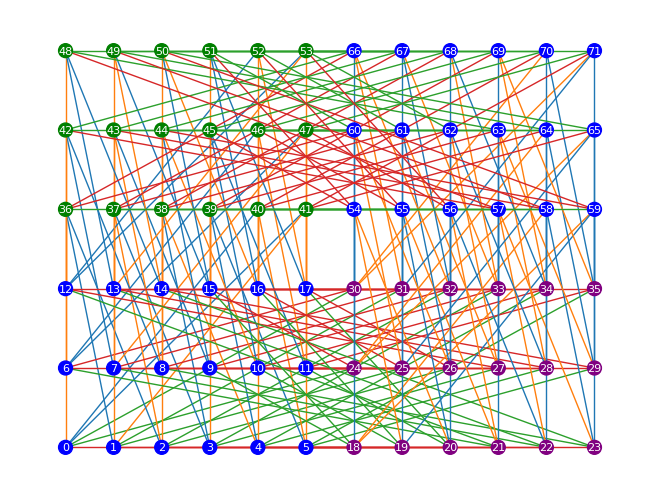

In [5]:
# For part = 'direction', the graph is colored by the direction of the edges in the Tanner graph.
# E, N, S, W are represented by colors 'tab:green', 'tab:blue', 'tab:orange', 'tab:red' respectively
code.draw_graph(part='direction')   # part = 'node', 'direction', 'color'